<a href="https://colab.research.google.com/github/alanabates/EDA-and-Predictive-Analytics-in-Python/blob/main/HW1_Bates_Alana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DESC 624 - EDA and Decision Tree Notebook**

HW #1

#**I. Python Setup Section**

In [ ]:
##Python Packages
import pandas as pd
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import seaborn as sn
import numpy as np
from scipy import stats

In [ ]:
#Install python datatable which is the same as data.table() in R
!pip install datatable
import datatable as dt

from datatable import (dt, f, by, ifelse, update, sort,
                       count, min, max, mean, sum, rowsum)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Python h2o -the Machine Learning package I will be using. 
 

! pip install h2o

import h2o

#h2o.init()
#h2o.shutdown()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#**II. Python Data Loading**

In [ ]:
#Loading Data in Python
bank_p = dt.fread("https://raw.githubusercontent.com/jjghockey/DESC624/main/bank-full.csv")
bank_p.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,…,campaign,pdays,previous,poutcome,y
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,…,1,−1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,…,1,−1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,…,1,−1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,…,1,−1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,…,1,−1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,…,1,−1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,…,1,−1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,…,1,−1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,…,1,−1,0,unknown,no


#**III. Python Data Exploration**

Pythons function for summary() only uses numeric values, so you will have to build categorical tables on your own.

In [ ]:
bank_p.names

('age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y')

Categorical tables using python

In [ ]:
bank_p['count'] = 1  #Building a new variable in order to count rows in the data
bank_p[f.y=="yes",'y1']=1
bank_p[f.y=="no",'y1']=0

bank_p[:, sum(f.count), by('y', 'y1')]  #Recode y into a 0/1 dummy variable for classification later.

,y,y1,count
,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪
0,no,0,39922
1,yes,1,5289


In [ ]:
bank_pd=bank_p.to_pandas()     #Use this to convert a datatable object into a pandas object. 
summary = bank_pd.describe()
summary = summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0
count,45211.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
y1,45211.0,0.116985,0.321406,0.0,0.0,0.0,0.0,1.0


In [ ]:
bank_pd.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,count,y1
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1,0


In [ ]:
bank_p[:, sum(f.count), by('marital') ]  #Summary table of Marital Status

,marital,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,divorced,5207
1,married,27214
2,single,12790


In [ ]:
bank_p[:, sum(f.count), by('job') ] #Summary table of education 

,job,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,admin.,5171
1,blue-collar,9732
2,entrepreneur,1487
3,housemaid,1240
4,management,9458
5,retired,2264
6,self-employed,1579
7,services,4154
8,student,938


In [ ]:
bank_p[:, sum(f.count), by('education') ] #Summary table of education 

,education,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,primary,6851
1,secondary,23202
2,tertiary,13301
3,unknown,1857


In [ ]:
bank_p[:, sum(f.count), by('default') ] #Summary table of default

,default,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,no,44396
1,yes,815


In [ ]:
bank_p[:, sum(f.count), by('housing') ] #Summary table of housing

,housing,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,no,20081
1,yes,25130


In [ ]:
bank_p[:, sum(f.count), by('loan') ] #Summary table of loan

,loan,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,no,37967
1,yes,7244


In [ ]:
bank_p[:, sum(f.count), by('contact') ] #Summary table of contact 

,contact,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,cellular,29285
1,telephone,2906
2,unknown,13020


In [ ]:
bank_p[:, sum(f.count), by('day') ] #Summary table of days

,day,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,1,322
1,2,1293
2,3,1079
3,4,1445
4,5,1910
5,6,1932
6,7,1817
7,8,1842
8,9,1561


In [ ]:
bank_p[:, sum(f.count), by('month') ] #Summary table of month

,month,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,apr,2932
1,aug,6247
2,dec,214
3,feb,2649
4,jan,1403
5,jul,6895
6,jun,5341
7,mar,477
8,may,13766


In [ ]:
bank_p[:, sum(f.count), by('poutcome') ] #Summary table of month

,poutcome,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,failure,4901
1,other,1840
2,success,1511
3,unknown,36959


*I want you to describe two additional features you think are useful for the model and why you think they are useful. Bring in outside research if necessary.  You need to create the features in either R or Python.  These features should be included in your Decision Tree model and your plots of the data should include these features against the response.*

**Feature 1** Age Categories: I believe that age categories would be useful to better assess which age groups are most likely to respond positively to the marketing campaign. 



**Feature 2** Job Categories: I believe that job categories would be useful to assess if there are any particular job groups that are more likely to respond postively than others. 

**Feature 3 and 4** I also decided to build a feature for the poutcome variable to group "other" and "unknown" together for the outcome of previous marketing campaigns. Additionally, I built a feature for the contact variable to change it into a phone variable since the only categories for the contact variable are cellular, telephone, or unknown. 







#**IV. Python Data Processing**

In [ ]:
#Adjusting values based on a review of the data
import numpy as np
bank_pd=bank_p.to_pandas()

In [ ]:
bank_pd.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,count,y1
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1,0


In [ ]:
#Filtering the data
bank_p=bank_p[f.duration>0,:] 
#Duration = 0 is perfect predictor of outcome variable

In [ ]:
# Building a Feature for Age Range Categories
bank_p[f.age < 18, 'Age_Category'] = 'Under 18'
bank_p[(f.age >= 18) & (f.age <= 24), 'Age_Category'] = '18 to 24'
bank_p[(f.age >= 25) & (f.age <= 34), 'Age_Category'] = '25 to 34'
bank_p[(f.age >= 35) & (f.age <= 49), 'Age_Category'] = '35 to 49'
bank_p[(f.age >= 50) & (f.age <= 59), 'Age_Category'] = '50 to 59'
bank_p[(f.age >= 60) & (f.age <= 69), 'Age_Category'] = '60 to 69'
bank_p[(f.age >= 70) & (f.age <= 79), 'Age_Category'] = '70 to 79'
bank_p[f.age >= 80, "Age_Category"] = "80+"
bank_p[:, sum(f.count), by("Age_Category") ]

,Age_Category,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,18 to 24,809
1,25 to 34,14203
2,35 to 49,20003
3,50 to 59,8409
4,60 to 69,1230
5,70 to 79,424
6,80+,130


In [ ]:
# Building a Feature for Job Categories
bank_p[f.job == "student", "Job_Category"] = "Unemployed"
bank_p[f.job == "unemployed", "Job_Category"] = "Unemployed"
bank_p[f.job == "retired", "Job_Category"] = "Unemployed"
bank_p[f.job == "unknown", "Job_Category"] = "Unknown"
bank_p[f.job == "housemaid", "Job_Category"] = "Services"
bank_p[f.job == "services", "Job_Category"] = "Services"
bank_p[f.job == "blue-collar", "Job_Category"] = "Blue Collar"
bank_p[f.job == "technician", "Job_Category"] = "Blue Collar"
bank_p[f.job == "entrepreneur", "Job_Category"] = "Business Professional"
bank_p[f.job == "management", "Job_Category"] = "Business Professional"
bank_p[f.job == "admin.", "Job_Category"] = "Business Professional"
bank_p[f.job == "self-employed", "Job_Category"] = "Self Employed"
bank_p[:, sum(f.count), by("Job_Category") ] 

,Job_Category,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,Blue Collar,17328
1,Business Professional,16114
2,Self Employed,1579
3,Services,5394
4,Unemployed,4505
5,Unknown,288


In [ ]:
# Building a feature that groups other and unknown together for the poutcome variable
bank_p[f.poutcome == "failure", "Previous_Outcome"] = "Failure"
bank_p[f.poutcome == "success" , "Previous_Outcome"] = "Success"
bank_p[f.poutcome == "unknown", "Previous_Outcome"] = "Unknown"
bank_p[f.poutcome == "other", "Previous_Outcome"] = "Unknown"
bank_p[:, sum(f.count), by("Previous_Outcome") ]

,Previous_Outcome,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,Failure,4901
1,Success,1511
2,Unknown,38796


In [ ]:
# Building a feature for Phone Number (Y/N)
bank_p[f.contact == "cellular", "Phone_No"] = "Yes"
bank_p[f.contact == "telephone", "Phone_No"] = "Yes"
bank_p[f.contact == "unknown", "Phone_No"] = "No"
bank_p[:, sum(f.count), by ("Phone_No") ]

,Phone_No,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,No,13019
1,Yes,32189


*This is where you are going to do some EDA work. You need to plot your data with graphics. I want to see 4 plots of the data against the response variable.  After each plot you need to summarize why the plot demonstrates or does not demonstrate that the feature could be useful in the model. You also need to create 2 contingency tables against the response. Again, you need to summarize why the contingency tables could be useful in the model.*


#V. Python Data Analysis

In [ ]:
bank_p.names

('age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y',
 'count',
 'y1',
 'Age_Category',
 'Job_Category',
 'Previous_Outcome',
 'Phone_No')

                y1       age   balance  campaign     pdays  previous
y1        1.000000  0.025155  0.052838 -0.073172  0.103621  0.093236
age       0.025155  1.000000  0.097783  0.004760 -0.023758  0.001288
balance   0.052838  0.097783  1.000000 -0.014578  0.003435  0.016674
campaign -0.073172  0.004760 -0.014578  1.000000 -0.088628 -0.032855
pdays     0.103621 -0.023758  0.003435 -0.088628  1.000000  0.454820
previous  0.093236  0.001288  0.016674 -0.032855  0.454820  1.000000


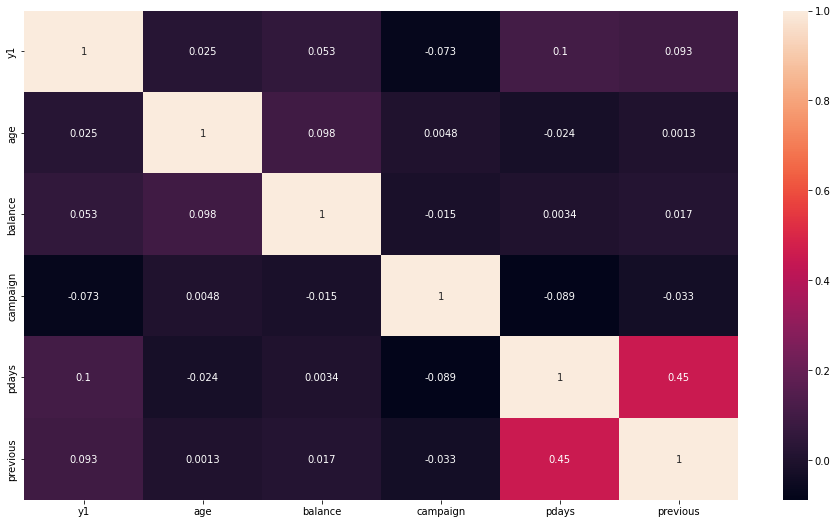

In [ ]:
#Plot 1 - Correlation Matrix and Heat Map
numeric_col = ['y1','age',
 'balance',
 'campaign',
 'pdays',
 'previous']


corr_matrix = bank_pd.loc[:,numeric_col].corr()
print(corr_matrix)
 
#Using heatmap to visualize the correlation matrix
sn.heatmap(corr_matrix, annot=True)

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


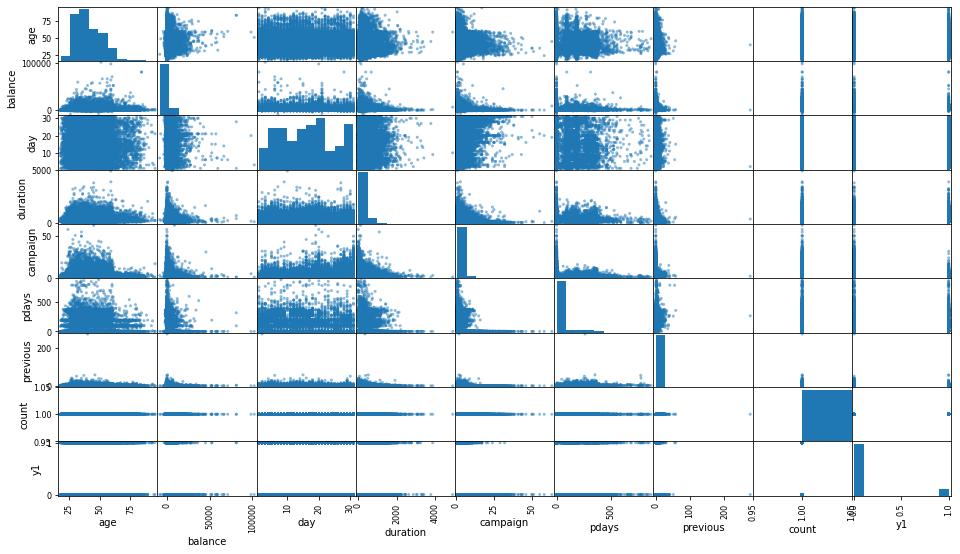

In [ ]:
#Plot 2 - Scatter Matrix
pd.plotting.scatter_matrix(bank_pd)
# plt.figure(figsize = (64,65))
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

y                            no       yes
Job_Category                             
Blue Collar            0.910665  0.089335
Business Professional  0.872471  0.127529
Self Employed          0.881571  0.118429
Services               0.911383  0.088617
Unemployed             0.780910  0.219090
Unknown                0.881944  0.118056


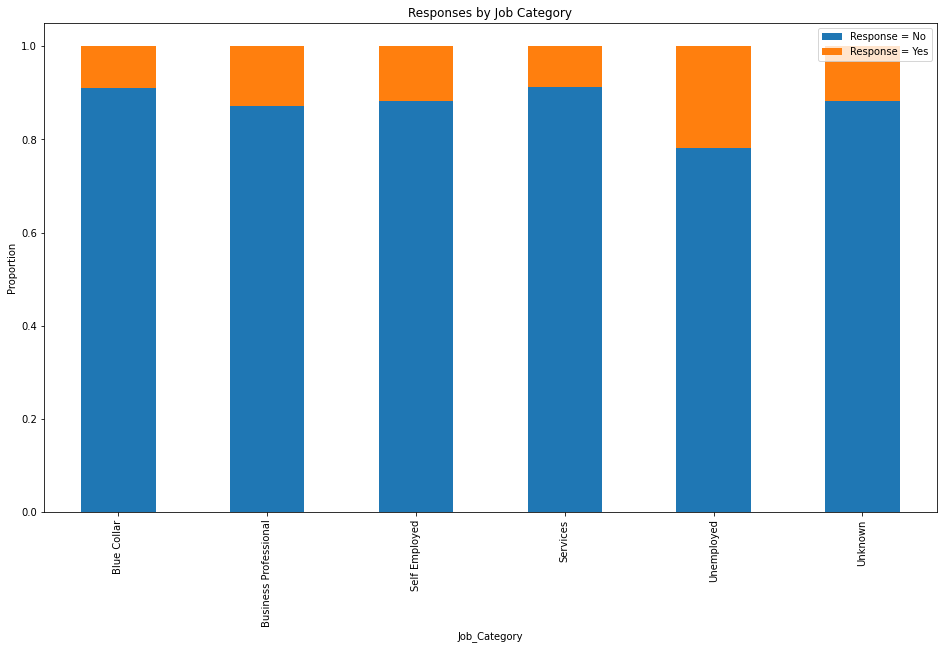

In [ ]:
#Plot 3 - Job Category on Respone Variable Bar Chart
bank_pd=bank_p.to_pandas()
crosstab_01 = pd.crosstab(bank_pd['Job_Category'], bank_pd['y'])
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
print(crosstab_norm)
crosstab_norm.plot(kind='bar', stacked = True)

plt.legend(['Response = No', 'Response = Yes'])
plt.title('Responses by Job Category')
plt.xlabel('Job_Category'); plt.ylabel('Proportion'); plt.show()

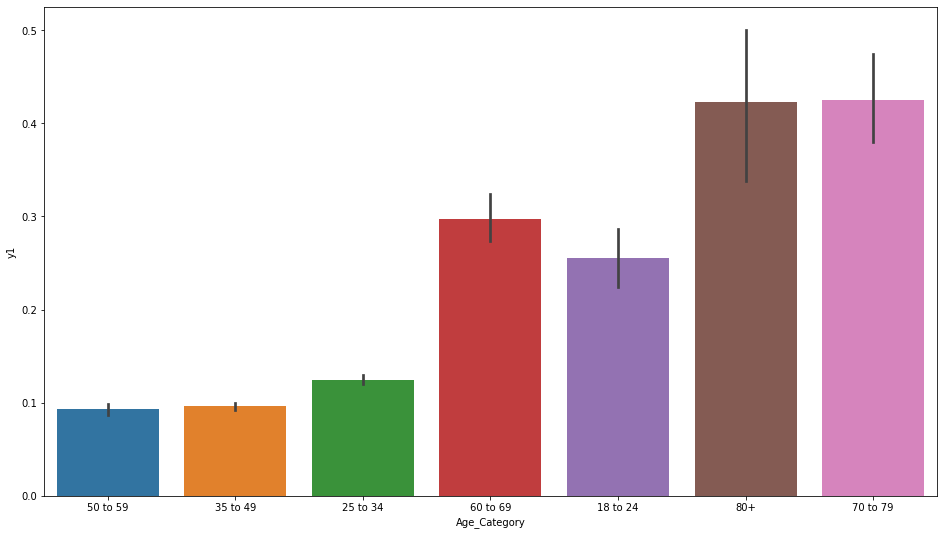

In [ ]:
# Plot 4 - Age Category on Response Variable Bar Chart
sn.barplot(x = bank_pd['Age_Category'], y = bank_pd['y1'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


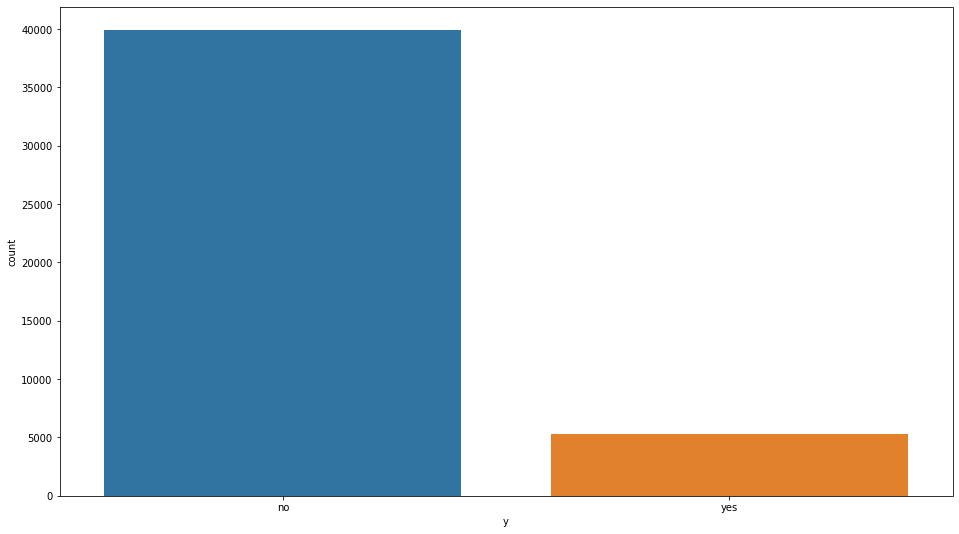

In [ ]:
#Plot 5 (To look at the amount of "Y' vs "N")
sn.countplot(bank_pd['y'])

In [ ]:
#Contingency Table 1: for Age_Category
bank_pd=bank_p.to_pandas()
crosstab_01 = pd.crosstab(bank_pd['Age_Category'], bank_pd['y'])
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
print(crosstab_norm)

y                   no       yes
Age_Category                    
18 to 24      0.744129  0.255871
25 to 34      0.875167  0.124833
35 to 49      0.903814  0.096186
50 to 59      0.906648  0.093352
60 to 69      0.703252  0.296748
70 to 79      0.575472  0.424528
80+           0.576923  0.423077


In [ ]:
#Contingency Table 2: for Previous_Outcome
bank_pd=bank_p.to_pandas()
crosstab_01 = pd.crosstab(bank_pd['Previous_Outcome'], bank_pd['y'])
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
print(crosstab_norm)

y                       no       yes
Previous_Outcome                    
Failure           0.873903  0.126097
Success           0.352747  0.647253
Unknown           0.904810  0.095190


In [ ]:
# Creating a dataframe
bank_pd = bank_p.to_pandas()
  
#Converting variables to factor variables for modeling
bank_pd['Job_Category'],_=pd.factorize(bank_pd['Job_Category'], sort=True)
bank_pd['marital'],_=pd.factorize(bank_pd['marital'], sort=True)
bank_pd['education'],_=pd.factorize(bank_pd['education'], sort=True)
bank_pd['default'],_=pd.factorize(bank_pd['default'], sort=True)
bank_pd['housing'],_=pd.factorize(bank_pd['housing'], sort=True)
bank_pd['loan'],_=pd.factorize(bank_pd['loan'], sort=True)
bank_pd['poutcome'],_=pd.factorize(bank_pd['poutcome'], sort=True)
bank_pd['contact'],_=pd.factorize(bank_pd['contact'], sort=True)
bank_pd['month'],_=pd.factorize(bank_pd['month'], sort=True)
bank_pd['Age_Category'],_=pd.factorize(bank_pd['Age_Category'], sort=True)

# Creating a dataframe with X% values of original dataframe
bank_pd_trn = bank_pd.sample(frac = 0.8)  #Put the percentage split here
  
# Creating dataframe with the rest of the X% values
bank_pd_tst = bank_pd.drop(bank_pd_trn.index)

*Now that the EDA is done for this round, I want you to prepare a decision tree model.*

1. Explain why you need to split your data into training and test sets?

2. What percentage split are you going to use?  

3. How does that percentage affect your model?  

4. If you select a higher or lower percentage for your training / test split what affect will it have on your validation of the model.

5. Why do you need to validate your model? 



**Question 1:** You need to split your data into training and test sets to train the algorithm and test its predictive accuracy using data that it was not trained with. Without splitting your data into a training and test set, predictive accuracy cannot be assessed and the model may be overfitted to the training data. 

**Question 2:** The percentage split I'm going to use is 80% in the training set and 20% in the test set. 

**Question 3:** The percentage split affects the amount of data the model learns to make predictions from. If not enough data is included in the training set, the model will not be able to make accurate predictions. On the other hand, if there is not enough data in the test set, it will be difficult to assess the model's predictive accuracy with future data. 

**Question 4:** A higher percentage split (90/10) would affect the validity of the model as there would be a smaller amount of data available to be used to test the model's predictive accuracy. Therefore, I may not get a comprehensive understanding of the model's predictive accuracy on data not included in the training set. A lower percentage split (70/30) may affect the validity of my model as there would be less data for the model to learn from. 

**Question 5.** You need to validate your model to assess and determine the model's predictive accuracy on data outside of the training set. Otherwise, the model may be biased or fail to accurately predict the outcome with future data. 


In [ ]:
trn=bank_pd_trn.loc[:,['Age_Category', 'Job_Category', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'campaign', 'previous','poutcome']]  #Put your predictors here, separated by commas. Each predictor needs to be enclosed in single quotes
tar=bank_pd_trn.loc[:,['y1']]
tst=bank_pd_tst.loc[:,['Age_Category', 'Job_Category', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'campaign', 'previous','poutcome']]  

In [ ]:
clf = tree.DecisionTreeClassifier() # defining decision tree classifier
clf=clf.fit(trn,tar)

In [ ]:
prediction = clf.predict(tst) #  Run Predictions

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

y=bank_pd_tst.loc[:,['y1']]

fpr, tpr, thresholds = metrics.roc_curve(y, prediction)
accuracy_score(y, prediction)

0.871820393718204

In [ ]:
metrics.auc(fpr, tpr)

0.5643246818246819

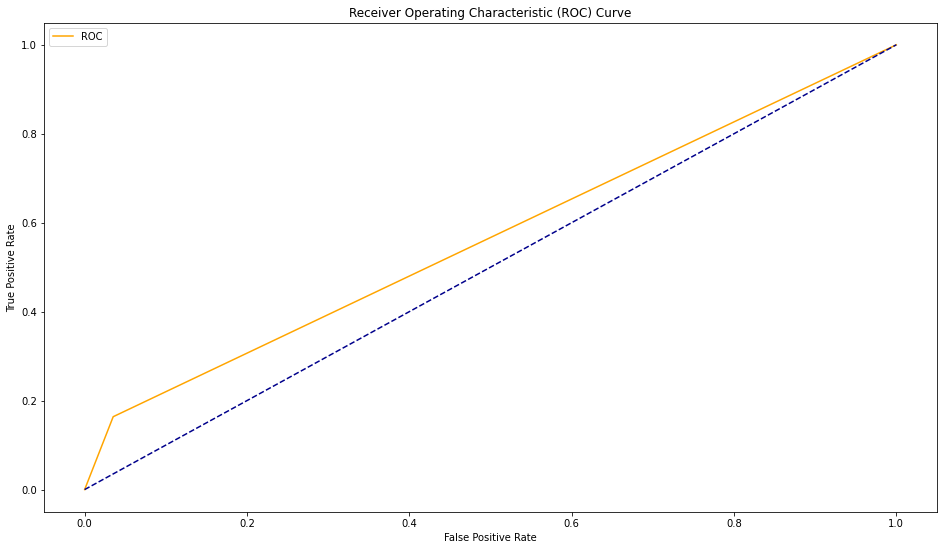

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

Adjust some tuning paramters.  Fill in the Xs with values.  The values next to each one are the defaults

In [ ]:
clf = tree.DecisionTreeClassifier(
    max_depth= 40  #Default=None
    , min_samples_leaf = 20 #X #Default=1
    , min_samples_split = 20 #Default=2
    , min_impurity_decrease = 0.0001)  #Default=0
clf=clf.fit(trn,tar)
prediction = clf.predict(tst) #  Run Predictions

[Text(0.515, 0.9444444444444444, 'poutcome <= 2.5\ngini = 0.207\nsamples = 36166\nvalue = [31927, 4239]\nclass = 0'),
 Text(0.24, 0.8333333333333334, 'poutcome <= 1.5\ngini = 0.356\nsamples = 6603\nvalue = [5071, 1532]\nclass = 0'),
 Text(0.16, 0.7222222222222222, 'housing <= 0.5\ngini = 0.237\nsamples = 5377\nvalue = [4640, 737]\nclass = 0'),
 Text(0.12, 0.6111111111111112, 'loan <= 0.5\ngini = 0.375\nsamples = 1644\nvalue = [1233, 411]\nclass = 0'),
 Text(0.08, 0.5, 'poutcome <= 0.5\ngini = 0.392\nsamples = 1462\nvalue = [1070, 392]\nclass = 0'),
 Text(0.04, 0.3888888888888889, 'gini = 0.36\nsamples = 998\nvalue = [763, 235]\nclass = 0'),
 Text(0.12, 0.3888888888888889, 'gini = 0.448\nsamples = 464\nvalue = [307, 157]\nclass = 0'),
 Text(0.16, 0.5, 'gini = 0.187\nsamples = 182\nvalue = [163, 19]\nclass = 0'),
 Text(0.2, 0.6111111111111112, 'gini = 0.159\nsamples = 3733\nvalue = [3407, 326]\nclass = 0'),
 Text(0.32, 0.7222222222222222, 'housing <= 0.5\ngini = 0.456\nsamples = 1226\nva

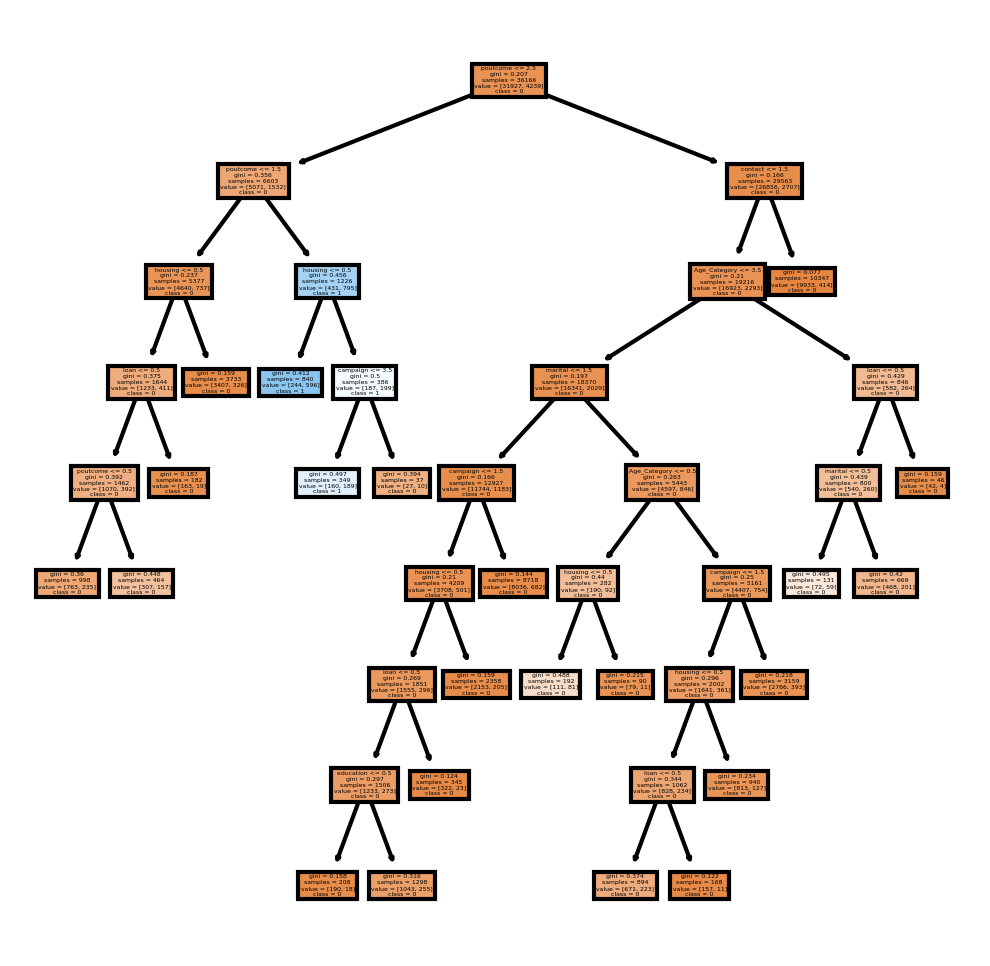

In [ ]:
#Display your tree
import statsmodels.tools.tools as stattools
from sklearn.tree import DecisionTreeClassifier, export_graphviz

X_names = ['Age_Category', 'Job_Category', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'campaign', 'previous','poutcome']
y_names = ['0','1']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(clf,feature_names = X_names, class_names=y_names, filled = True)

1. Describe what your tree looks like after you adjusted tuning parameters?
**Answer:** I adjusted the minimum impurity decrease to make my model smaller and more easy to see. I also adjusted the minimum sample leafs and minimum sample split. After making these adjustments, my tree is large and has a lot of nodes. 

2. Generally, why are tuning parameters important in models?
**Answer:** Tuning parameters are important in models as they help with overfitting where the model overemphasizes patterns in the training set that are not reproducible with future data. By using tuning parameters, overfitting issues can be minimized and the model's predictive accuracy can be more easily assessed. 

In [ ]:
y=bank_pd_tst.loc[:,['y1']]

fpr, tpr, thresholds = metrics.roc_curve(y, prediction)
accuracy_score(y, prediction)

0.8931652289316523

In [ ]:
metrics.auc(fpr, tpr)

0.5797082797082798

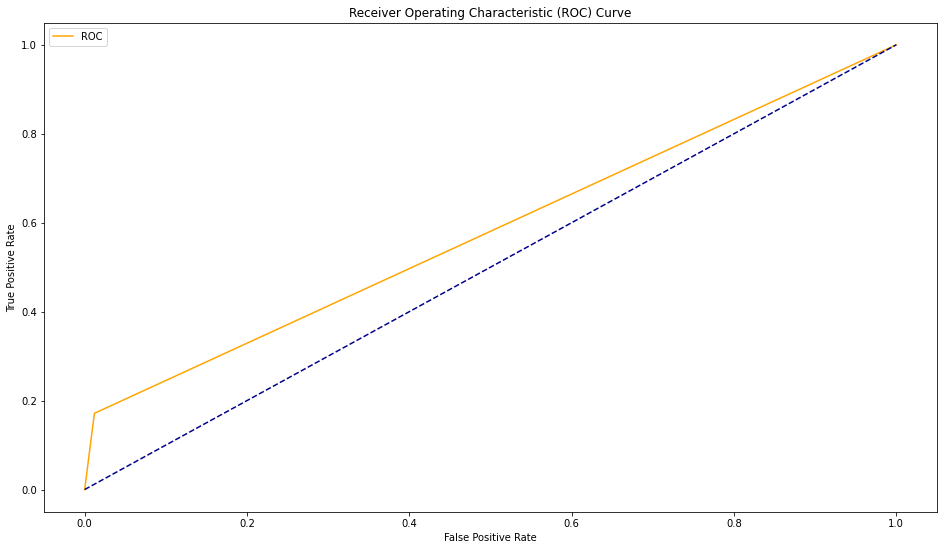

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

1. Please describe AUC.  
**Answer:** AUC is a single measurement that evaluates the predictive accuracy of a model using the ROC. AUC assigns different thresholds and determines the classification at each of the assigned thresholds. 

2. What is it used to measure?
**Answer: ** AUC is used to measure the predictive accuracy of a classification model by determining how much area is covered by the ROC.

3. How did your model do? 
**Answer: ** My model's AUC is 0.58 which is not the best. Ideally, I would want to get the AUC up to around 0.7. 

4. Do you think your model has a reliable prediction? Why or Why Not?
**Answer:** I think my model doesn't have the most reliable prediction at the moment. Further tweaking of the tuning parameters could potentially help get my model to a more reliable prediction accuracy. 

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import mutual_info_classif

feat_importance = clf.tree_.compute_feature_importances(normalize=True)
feat_importance  #Outputs in order of the predictors you listed

array([0.07470929, 0.        , 0.03256327, 0.0038946 , 0.        ,
       0.09853741, 0.02746942, 0.07607929, 0.01981229, 0.        ,
       0.66693443])

1. Where any of the features you developed important? Please describe.
**Answer**: Yes, both the age category feature and the job category feature I developed are important. The age category feature breaks the age data down into age ranges and makes it easier to asses which age groups are most likely to be positive responders. This is helpful as age ranges are more useful when identifying patterns in the data than various different ages that are not grouped together. The job category feature I developed is useful as it groups various different job variables into categories. This is helpful as it allows me to analyze broader target job categories and the effect those job categories have on the dependent variable.